<a href="https://colab.research.google.com/github/jthurber24/Vehicle-Price-Analysis/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('car_prices.csv')
print(data)

        year     make                model        trim   body transmission  \
0       2015      Kia              Sorento          LX    SUV    automatic   
1       2015      Kia              Sorento          LX    SUV    automatic   
2       2014      BMW             3 Series  328i SULEV  Sedan    automatic   
3       2015    Volvo                  S60          T5  Sedan    automatic   
4       2014      BMW  6 Series Gran Coupe        650i  Sedan    automatic   
...      ...      ...                  ...         ...    ...          ...   
179470  2014  Hyundai       Santa Fe Sport       Sport    SUV    automatic   
179471  2014  Hyundai                Equus   Signature  Sedan    automatic   
179472  2014  Hyundai               Sonata         GLS  Sedan    automatic   
179473  2014  Hyundai              Elantra          SE  Sedan    automatic   
179474  2014  Hyundai               Sonata         GLS  Sedan    automatic   

                      vin state  condition  odometer  color int

Data Cleaning

In [ ]:
clean1 = data.dropna()
clean1.reset_index()
clean1 = clean1[:100000]
clean1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127483,2008,Chevrolet,Malibu,LS,Sedan,automatic,1g1zg57b38f232763,fl,29.0,64968.0,brown,brown,santander consumer,6800.0,6300.0,Thu Jan 15 2015 01:35:00 GMT-0800 (PST)
127484,2008,Chrysler,300,Touring,Sedan,automatic,2c3la53g28h137694,md,25.0,52038.0,white,gray,tischer acura nissan,9550.0,10100.0,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)
127485,2008,Chevrolet,TrailBlazer,LT,SUV,automatic,1gndt13s782108148,oh,35.0,110207.0,gray,black,mike albert limited,6275.0,5500.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
127486,2008,Dodge,Avenger,SXT,Sedan,automatic,1b3lc56r58n286693,ca,2.0,79205.0,black,gray,jpmorgan chase bank n.a.,5900.0,5100.0,Thu Jan 22 2015 04:00:00 GMT-0800 (PST)


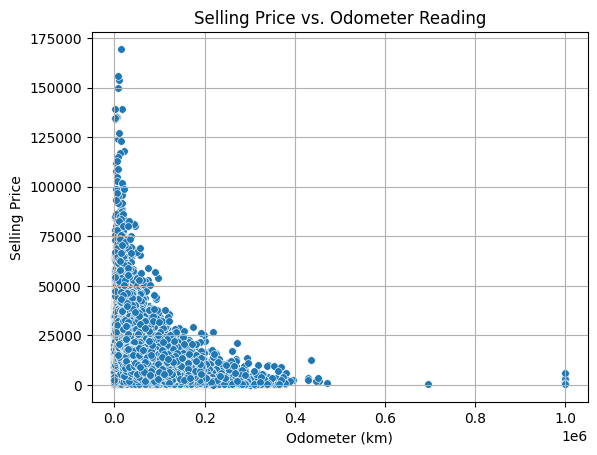

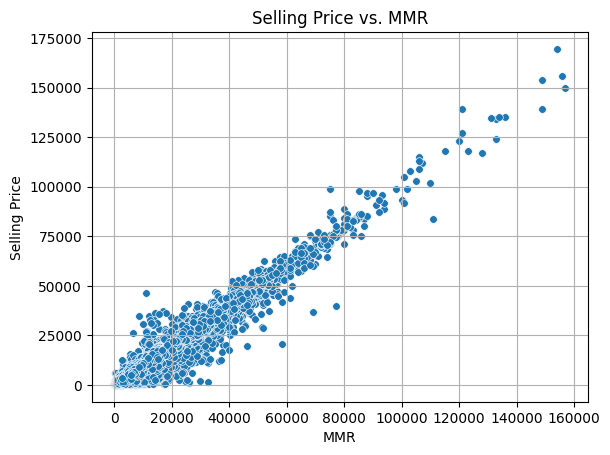

In [ ]:
sns.scatterplot(clean1, x="odometer", y="sellingprice", s=30)
plt.xlabel("Odometer (km)")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Odometer Reading")
plt.grid(True)

plt.show()

sns.scatterplot(clean1, x="mmr", y="sellingprice", s=30)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. MMR")
plt.grid(True)

plt.show()

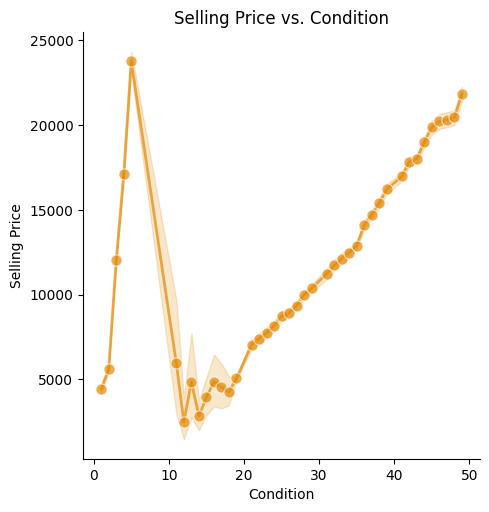

In [ ]:
sns.relplot(
    x="condition",
    y="sellingprice",
    color="#E38804",
    kind="line",
    data=clean1,
    linewidth=2,
    marker="o",
    markersize=8,
    alpha=0.7,
    dashes=False,
    legend="full",
)


plt.xlabel("Condition")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Condition")


plt.show()

<ipython-input-6-ea3fca55e90d>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(


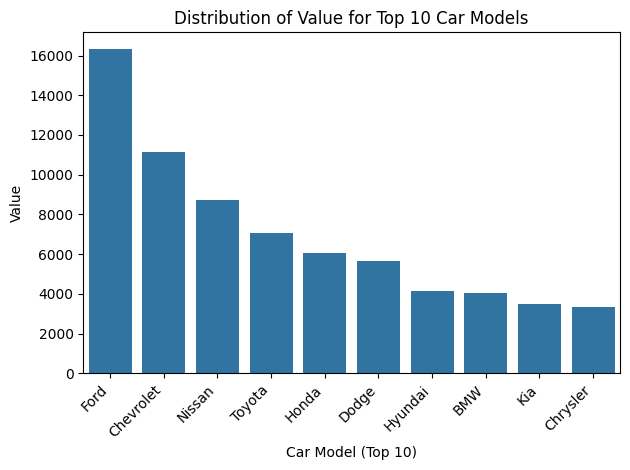

In [ ]:
values = clean1["make"].value_counts().sort_values(ascending=False)
val = values.values
model = values.index

sns.barplot(
    x=model[0:10],
    y=val[0:10],
    errwidth=2,
    capsize=7,
)

plt.xlabel("Car Model (Top 10)")
plt.ylabel("Value")
plt.title("Distribution of Value for Top 10 Car Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

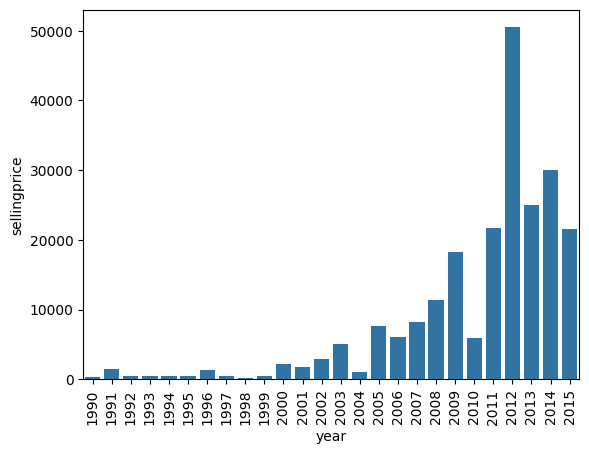

In [ ]:
year_df = clean1.groupby(by="year", as_index=False)["sellingprice"].first()

fig = sns.barplot(year_df, x="year", y="sellingprice")
plt.xticks(rotation=90)
plt.show()

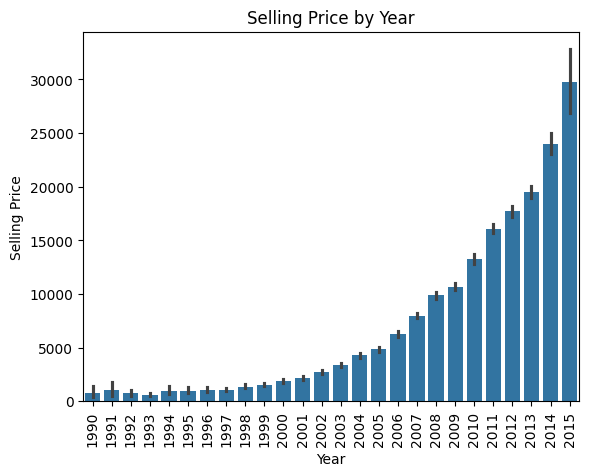

In [ ]:
data_by_seller = clean1.groupby(by=["seller", "year"], as_index=False)[
    "sellingprice"
].first()
data_by_seller.sort_values(by="sellingprice", ascending=False, inplace=True)

sns.barplot(
    data_by_seller,
    x="year",
    y="sellingprice",
)
plt.title("Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.xticks(rotation=90)
plt.show()

In [ ]:
max_price_index = data_by_seller["sellingprice"].idxmax()
row_with_max_price = data_by_seller.loc[max_price_index]

seller_with_max_price = row_with_max_price["seller"]
max_selling_price = row_with_max_price["sellingprice"]
year_of_max_price = row_with_max_price["year"]

print(
    f"The seller, {seller_with_max_price}, bought at the maximum selling price of {max_selling_price:.1f} in year {year_of_max_price}."
)

The seller, chicago motor car corporation, bought at the maximum selling price of 154000.0 in year 2012.


In [ ]:
make_price = clean1.groupby(by="make", as_index=False)["sellingprice"].first()
make_price.sort_values(by="sellingprice", ascending=False, inplace=True)

make_price.head(10)

,make,sellingprice
11,Ferrari,154000.0
39,Rolls-Royce,149800.0
4,Bentley,96000.0
45,Tesla,80000.0
12,Fisker,54500.0
1,Aston Martin,51000.0
37,Porsche,46500.0
30,Mercedes-Benz,45500.0
6,Cadillac,44000.0
24,Land Rover,42000.0


In [ ]:
max_price_make = make_price.head(1)["make"].values[0]

min_price_make = make_price.tail(1)["make"].values[0]

print("Car make with the maximum selling price:", max_price_make)
print("Car make with the minimum selling price:", min_price_make)

Car make with the maximum selling price: Ferrari
Car make with the minimum selling price: Geo


<ipython-input-12-8dae28c14d2b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-12-8dae28c14d2b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")


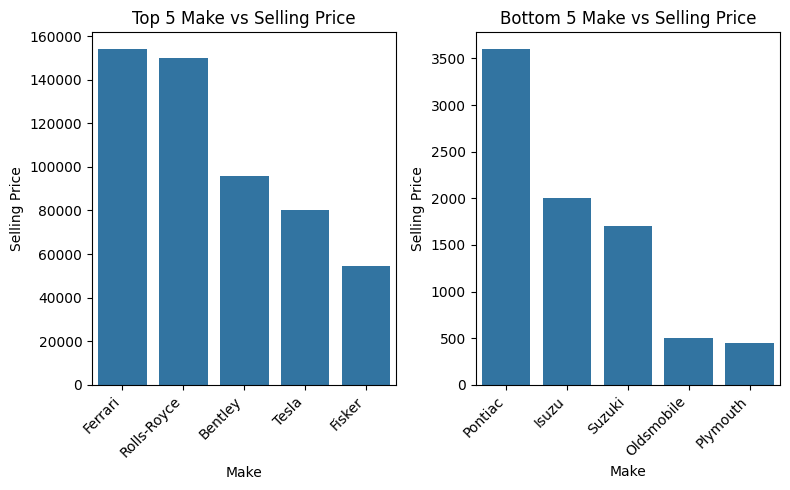

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))


sns.barplot(data=make_price[0:5], x="make", y="sellingprice", ax=axs[0])
axs[0].set_title("Top 5 Make vs Selling Price")
axs[0].set_xlabel("Make")
axs[0].set_ylabel("Selling Price")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


sns.barplot(data=make_price[-6:-1], x="make", y="sellingprice", ax=axs[1])
axs[1].set_title("Bottom 5 Make vs Selling Price")
axs[1].set_xlabel("Make")
axs[1].set_ylabel("Selling Price")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")


plt.tight_layout()


plt.show()

In [ ]:
new_df = clean1.groupby(
    by=["year", "make", "transmission", "condition", "color", "odometer", "mmr"],
    as_index=False,
)["sellingprice"].first()


new_df.sort_values(by="sellingprice", ascending=False).head(2)

,year,make,transmission,condition,color,odometer,mmr,sellingprice
67507,2012,Rolls-Royce,automatic,45.0,black,14316.0,154000.0,169500.0
55029,2012,Ferrari,automatic,45.0,silver,8149.0,156000.0,156000.0


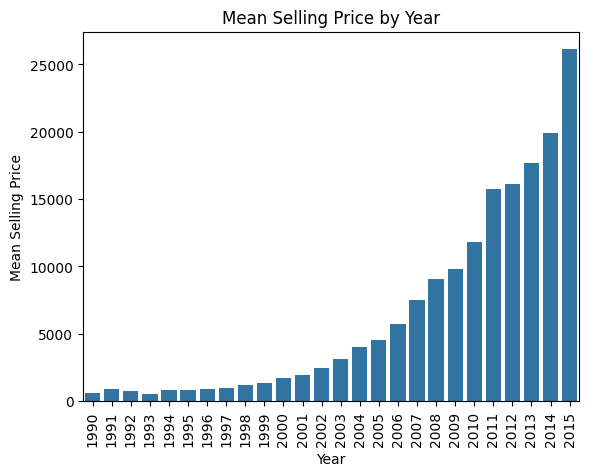

In [ ]:
yearly_mean_price = (
    new_df.groupby("year", as_index=False)["sellingprice"].mean()
).round(2)

sns.barplot(
    x=yearly_mean_price["year"],
    y=yearly_mean_price["sellingprice"]
)

plt.title("Mean Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Mean Selling Price")
plt.xticks(rotation=90)

plt.show()

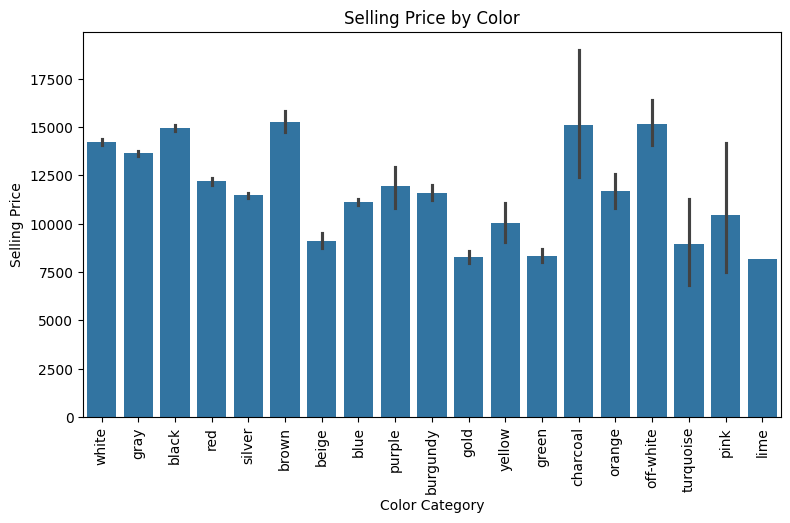

In [ ]:
filtered_df = clean1[clean1["color"] != "—"]

palette = "Set3"

plt.figure(figsize=(9, 5))
sns.barplot(
    filtered_df,
    x="color",
    y="sellingprice"
)
plt.xlabel("Color Category")
plt.ylabel("Selling Price")
plt.title("Selling Price by Color")

plt.xticks(rotation=90)

plt.show()


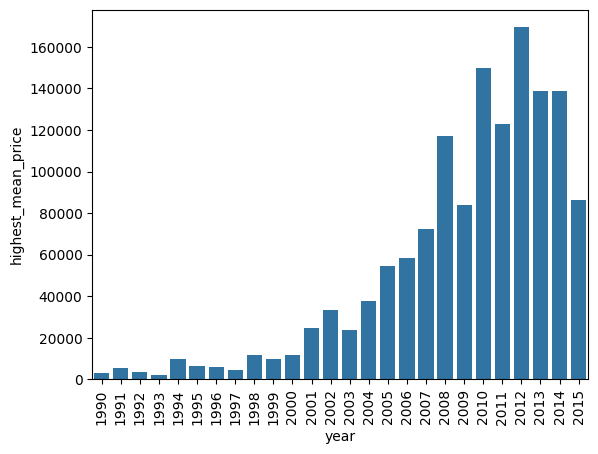

In [ ]:
top_makes_per_year = new_df.groupby("year", as_index=False).apply(
    lambda x: x.nlargest(1, "sellingprice", keep="all")
)

top_makes_per_year = top_makes_per_year.rename(
    columns={"sellingprice": "highest_mean_price"}
)

sns.barplot(top_makes_per_year, x="year", y="highest_mean_price")

plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


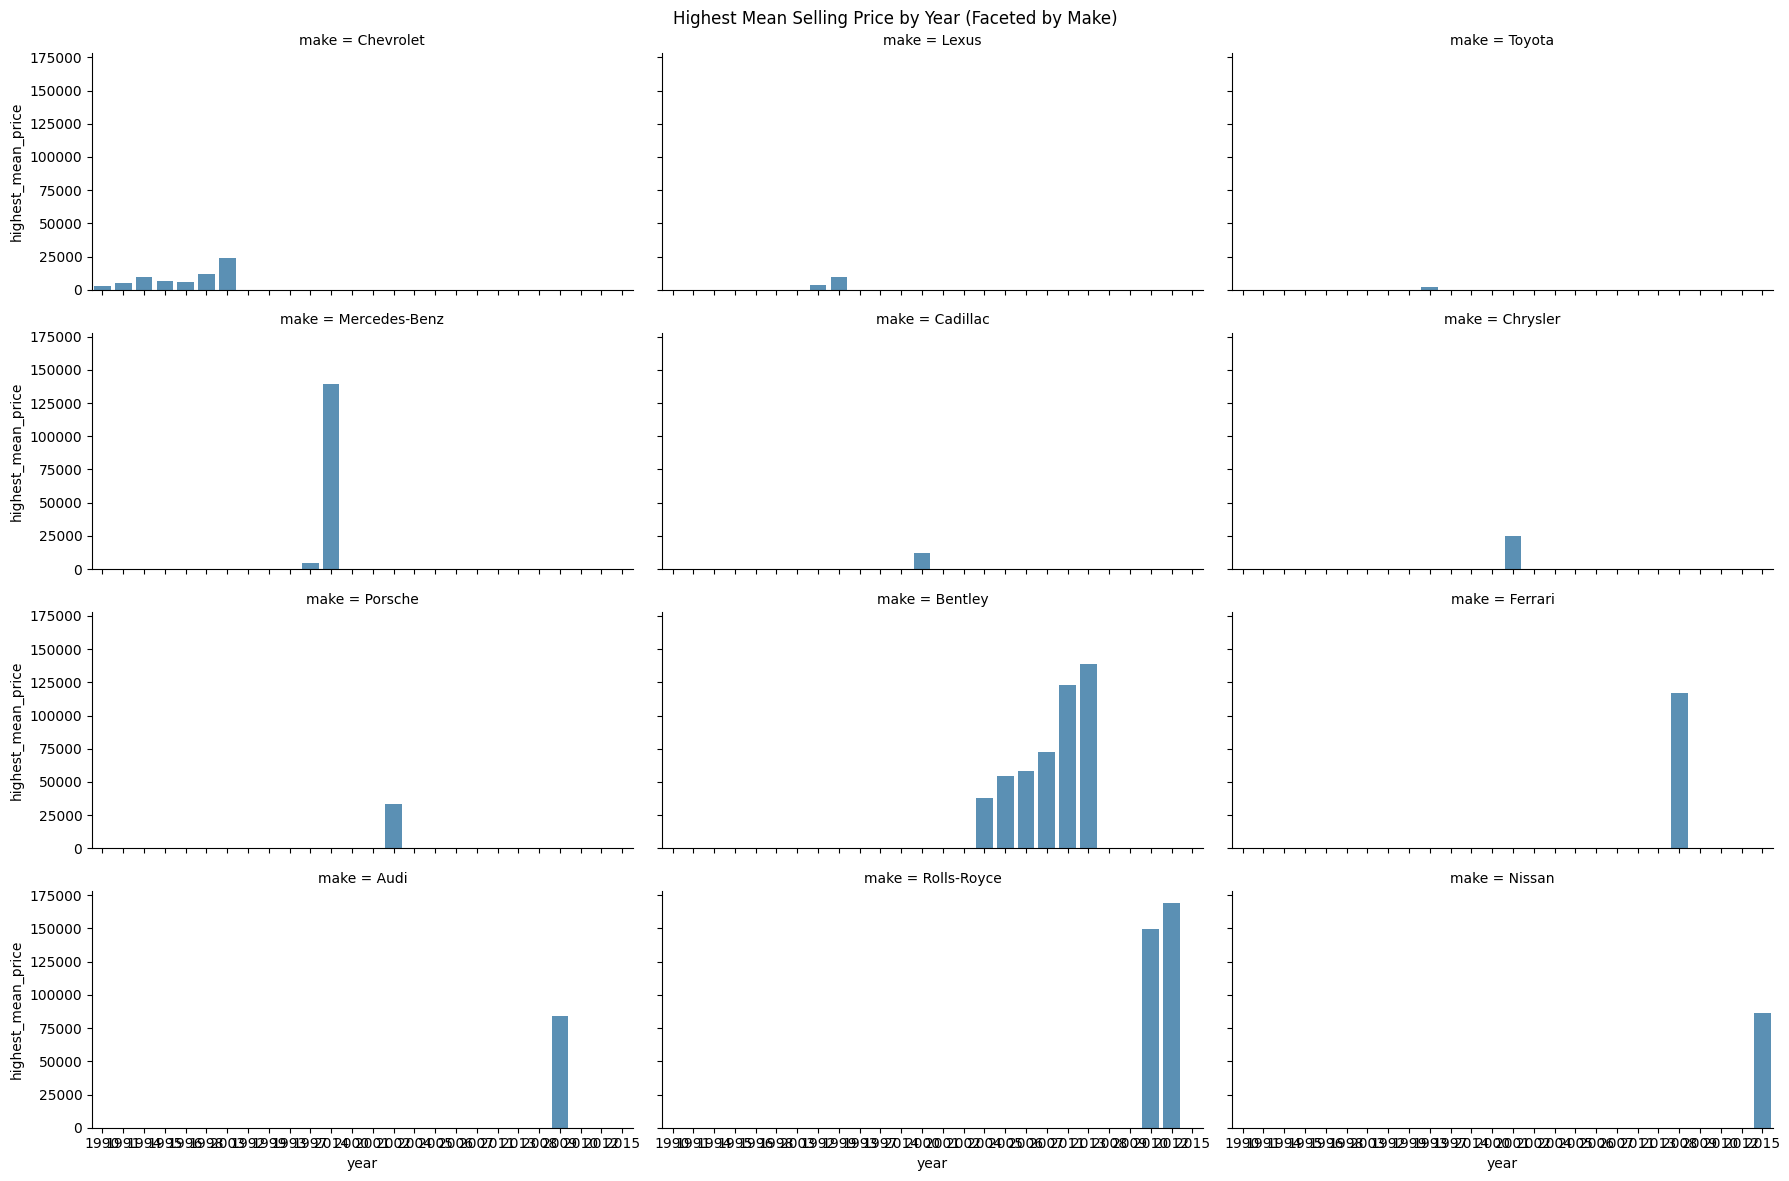

In [ ]:
g = sns.FacetGrid(top_makes_per_year, col="make", col_wrap=3, aspect=2)

g.map(sns.barplot, "year", "highest_mean_price", linewidth=1, alpha=0.8)

g.fig.suptitle("Highest Mean Selling Price by Year (Faceted by Make)")
plt.tight_layout()
plt.show()

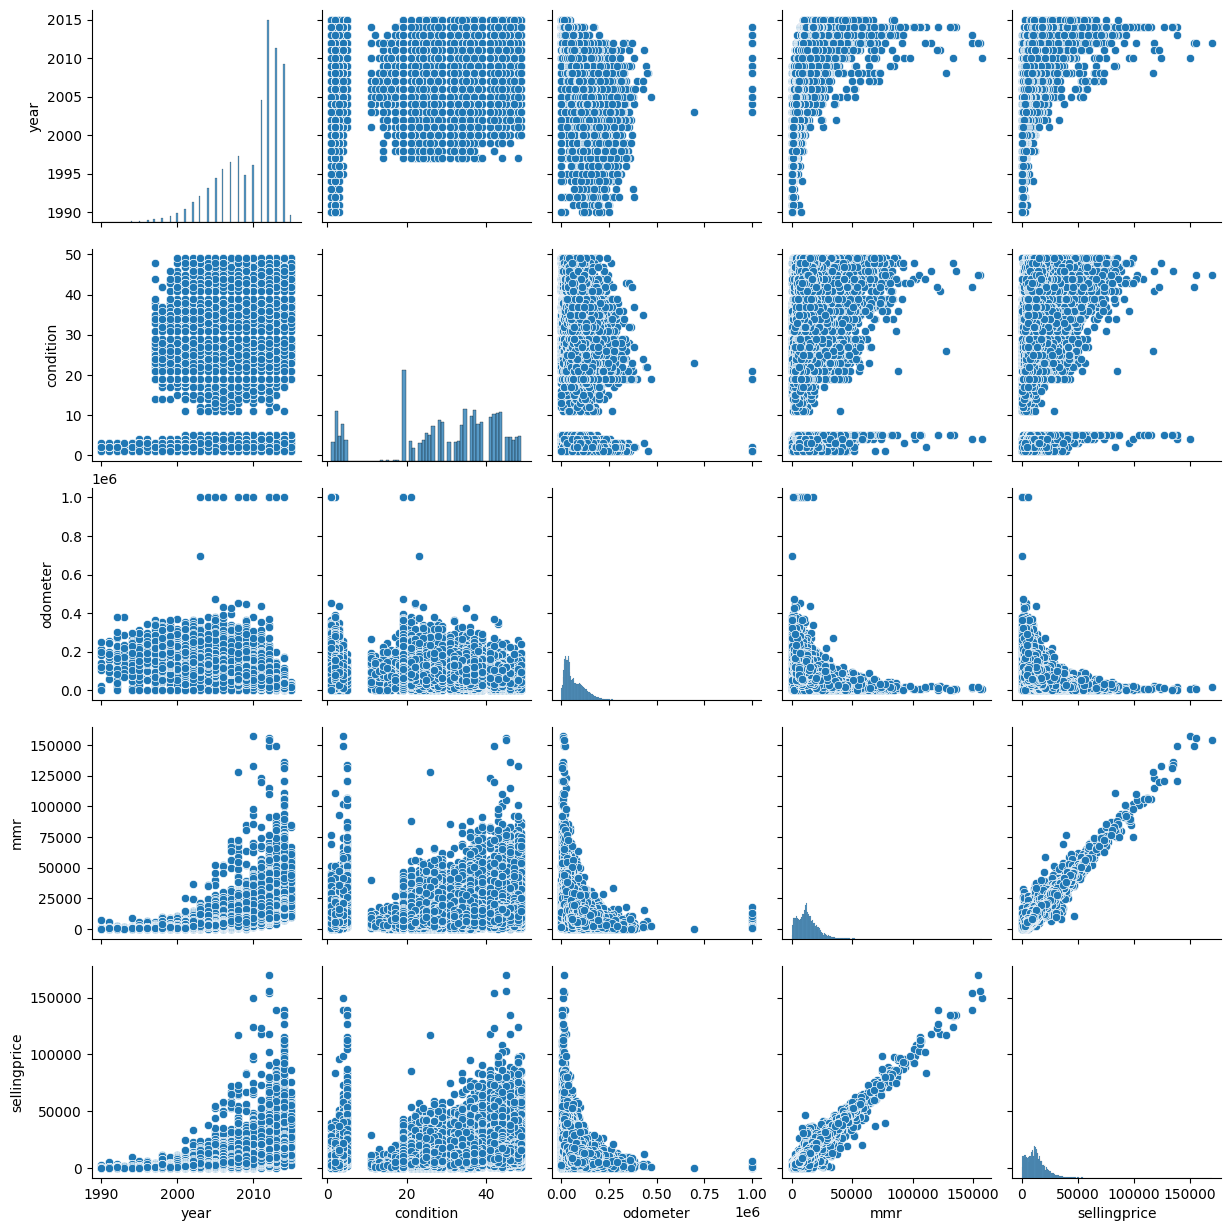

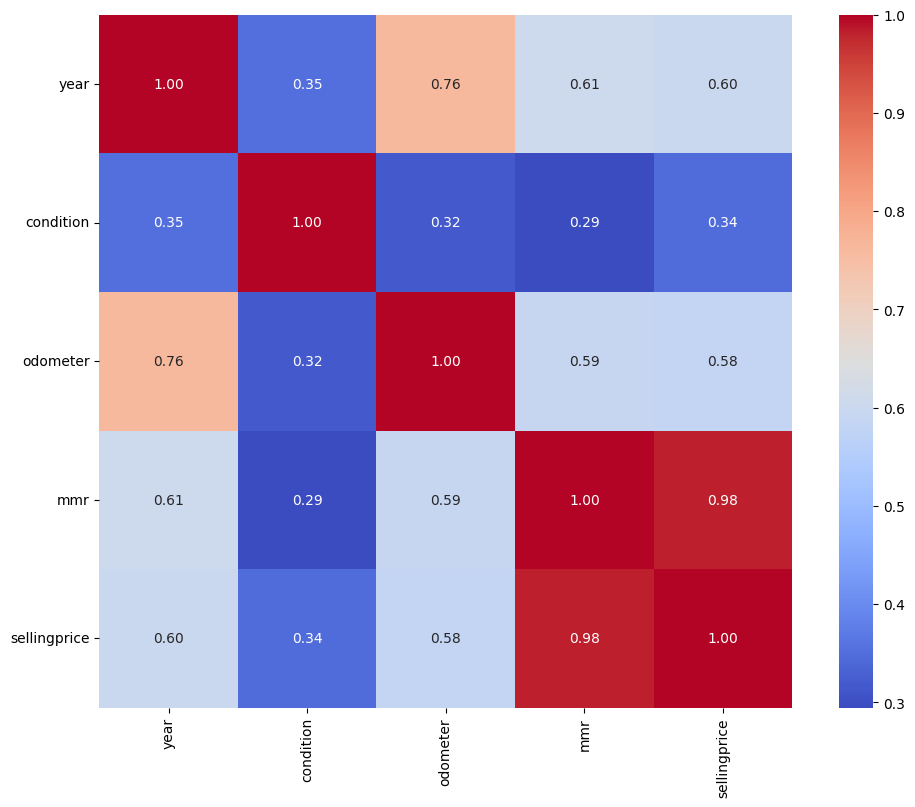

In [ ]:
import numpy as np

# Convert quantitive datatypes to numerics
datatypes = {'quant': ['year', 'odometer', 'sellingprice'],
             'qual': ['make', 'transmission', 'model', 'trim', 'body', 'condition', 'state', 'color', 'interior']}
quants = clean1[datatypes['quant']].astype(np.float_)
clean2 = pd.concat([quants, clean1[datatypes['qual']]], axis=1)
sns.pairplot(clean1);

# Select only numeric columns for correlation calculation
numeric_cols = clean1.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr().abs()
# Plotting
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



In [ ]:
standardization_map = {
    'vw': 'Volkswagen',
    'ford tk': 'Ford',
    'airstream': 'Airstream',
    'chev truck': 'Chevrolet',
    'dot' : 'Dodge',
    'dodge tk': 'Dodge',
    'ford tk': 'Ford',
    'ford truck': 'Ford',
    'gmc truck': 'GMC',
    'hyundai tk': 'Hyundai',
    'landrover': 'Land Rover',
    'mazda tk': 'Mazda',
    'mercedes-b': 'Mercedes-Benz',
    'mercedes': 'Mercedes-Benz',
    'smart': 'Smart',
}

clean1['make'] = clean1['make'].replace(standardization_map, regex=False)

standardization_map = {
    '3-sep': '9-3',
    '5-sep' : '9-5',
    '3': 'Mazda3',
    '6': 'Mazda6'
}

clean1['model'] = clean1['model'].replace(standardization_map)

unique_models = clean1['model'].unique()

mask = ~clean1['color'].str.contains('â€”') & ~clean1['interior'].str.contains('â€”')

clean2 = clean1[mask]

clean2 = clean2[(clean2['sellingprice'] > 150) & (clean2['sellingprice'] <= 190000)]

clean2 = clean2[clean2['condition'] >= 11]
clean2

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127481,2008,Chevrolet,Tahoe Hybrid,Base,SUV,automatic,1gnfc13538r212095,tx,27.0,192911.0,gray,gray,auto one acceptance llc,7150.0,5300.0,Tue Jan 13 2015 02:30:00 GMT-0800 (PST)
127483,2008,Chevrolet,Malibu,LS,Sedan,automatic,1g1zg57b38f232763,fl,29.0,64968.0,brown,brown,santander consumer,6800.0,6300.0,Thu Jan 15 2015 01:35:00 GMT-0800 (PST)
127484,2008,Chrysler,300,Touring,Sedan,automatic,2c3la53g28h137694,md,25.0,52038.0,white,gray,tischer acura nissan,9550.0,10100.0,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)
127485,2008,Chevrolet,TrailBlazer,LT,SUV,automatic,1gndt13s782108148,oh,35.0,110207.0,gray,black,mike albert limited,6275.0,5500.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)


In [ ]:
#one hot encoding
df_encoded = pd.get_dummies(clean2, columns=['make', 'transmission', 'body', 'state', 'color', 'interior'], dtype='int')
df_encoded.columns

Index(['year', 'model', 'trim', 'vin', 'condition', 'odometer', 'seller',
       'mmr', 'sellingprice', 'saledate',
       ...
       'interior_green', 'interior_off-white', 'interior_orange',
       'interior_purple', 'interior_red', 'interior_silver', 'interior_tan',
       'interior_white', 'interior_yellow', 'interior_—'],
      dtype='object', length=171)

In [ ]:
withMMR = df_encoded.drop(columns=['vin', 'saledate', 'trim', 'seller', 'model'])
noMMR = df_encoded.drop(columns=['vin', 'saledate', 'mmr', 'trim', 'seller', 'model'])


In [ ]:
noMMR.reset_index()

,index,year,condition,odometer,sellingprice,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,...,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow,interior_—
0,2,2014,45.0,1331.0,30000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2015,41.0,14282.0,27750.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2014,43.0,2641.0,67000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,2014,34.0,14943.0,65000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8,2014,42.0,9557.0,32250.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86380,127481,2008,27.0,192911.0,5300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86381,127483,2008,29.0,64968.0,6300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86382,127484,2008,25.0,52038.0,10100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86383,127485,2008,35.0,110207.0,5500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
withMMR.describe()

,year,condition,odometer,mmr,sellingprice,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,...,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow,interior_—
count,86385.000000,86385.000000,86385.000000,86385.000000,86385.000000,86385.000000,86385.000000,86385.000000,86385.000000,86385.000000,...,86385.000000,86385.000000,86385.000000,86385.000000,86385.00000,86385.000000,86385.000000,86385.000000,86385.000000,86385.000000
mean,2010.065648,34.305192,67198.995740,13565.886149,13388.891532,0.011854,0.000012,0.011159,0.042079,0.000220,...,0.000544,0.000972,0.000347,0.000590,0.00228,0.002072,0.083602,0.000556,0.000058,0.018452
std,3.571221,8.891718,50572.537586,9138.141598,9192.474445,0.108229,0.003402,0.105047,0.200771,0.014829,...,0.023319,0.031168,0.018632,0.024291,0.04770,0.045474,0.276792,0.023566,0.007608,0.134581
min,1997.000000,11.000000,1.000000,25.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,27.000000,28731.000000,7225.000000,7000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,36.000000,52073.000000,12150.000000,12000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,42.000000,97558.000000,17850.000000,17700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2015.000000,49.000000,999999.000000,156000.000000,169500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizing the features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Qualitative Variables

make
Ford             14572
Chevrolet         9044
Nissan            7775
Toyota            6329
Honda             5489
Dodge             4470
BMW               3635
Hyundai           3593
Kia               3087
Infiniti          3068
Mercedes-Benz     2738
Chrysler          2352
Jeep              2093
Lexus             1954
Volkswagen        1929
Mazda             1467
GMC               1433
Cadillac          1176
Acura             1024
Audi               964
Subaru             945
Lincoln            882
Pontiac            752
Buick              727
Mitsubishi         707
Ram                650
Volvo              571
MINI               509
Saturn             468
Scion              316
Mercury            296
Jaguar             271
Land Rover         259
Porsche            214
Suzuki             186
HUMMER             117
Saab                96
FIAT                70
Oldsmobile          46
Smart               43
Isuzu               29
Bentley             19
Maserati            11
Ferrar

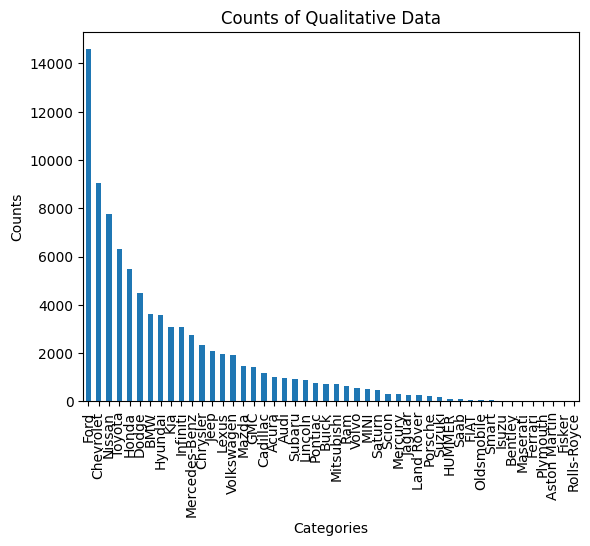

In [ ]:
qualitative_counts = clean2['make'].value_counts()
print(qualitative_counts)

# Plot the counts on a bar chart
qualitative_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Qualitative Data')

# Show the plot
plt.show()

Scatter Matrix

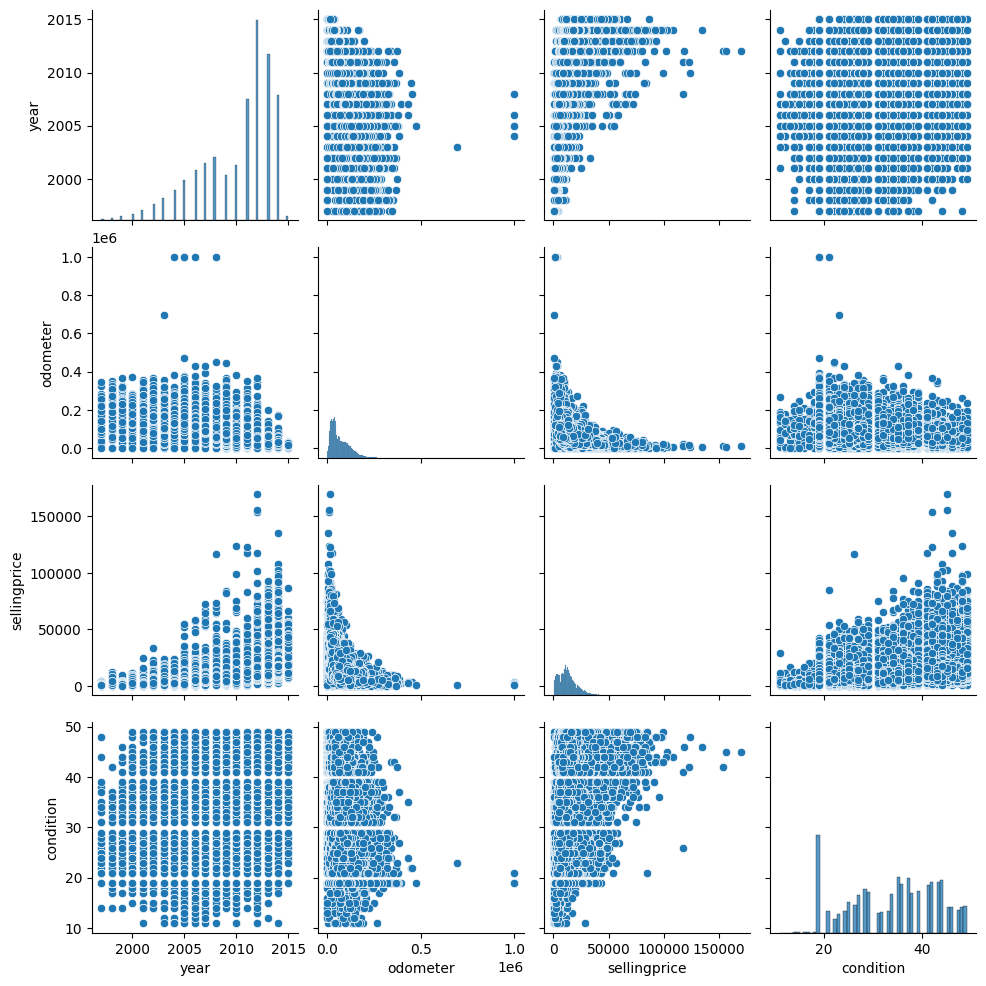

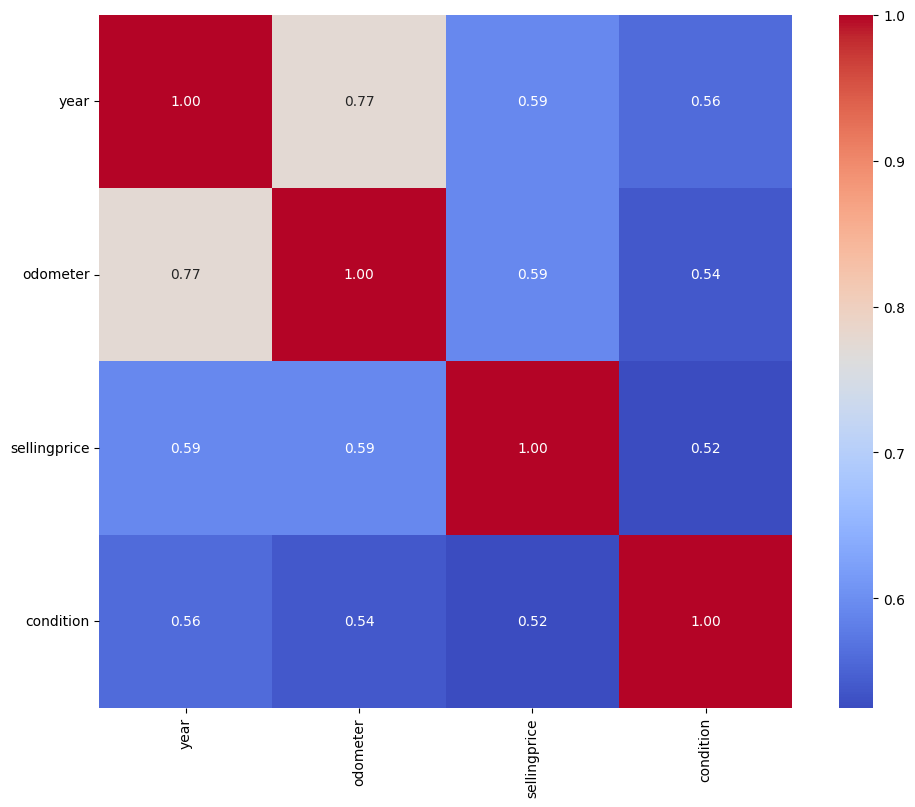

In [ ]:
# Convert quantitive datatypes to numerics
datatypes = {'quant': ['year', 'odometer', 'sellingprice'],
             'qual': ['make', 'transmission', 'model', 'trim', 'body', 'condition', 'state', 'color', 'interior']}
quants = clean2[datatypes['quant']].astype(np.float_)
clean2 = pd.concat([quants, clean2[datatypes['qual']]], axis=1)
sns.pairplot(clean2);

# Select only numeric columns for correlation calculation
numeric_cols = clean2.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr().abs()
# Plotting
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



#**Models**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### KFold Split

In [ ]:
# Define the KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create empty lists for training and testing data
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

# Iterate through each fold
for train_index, test_index in kfold.split(withMMR):
    # Get the training and testing data for this fold
    X_train, X_test = withMMR.iloc[train_index], withMMR.iloc[test_index]

    # Get the target variables
    y_train, y_test = X_train["sellingprice"], X_test["sellingprice"]

    # Remove 'sellingprice' column from feature variables
    X_train = X_train.drop(columns=['sellingprice'])
    X_test = X_test.drop(columns=['sellingprice'])



    # Append the data to the lists
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)


# Linear Regression

In [ ]:
# Initialize Linear Regression model
lr_regressor = LinearRegression()

# Train and evaluate the model for each fold
for i in range(5):
    # Fit the model on training data
    lr_regressor.fit(X_train_list[i], y_train_list[i])

    # Predict on testing data
    y_pred = lr_regressor.predict(X_test_list[i])

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_list[i], y_pred)

    # Print the MSE for each fold
    print(f"Fold {i+1}: Mean Squared Error = {mse}")

Fold 1: Mean Squared Error = 2059366.8417602326
Fold 2: Mean Squared Error = 1920768.5073092496
Fold 3: Mean Squared Error = 1952993.045785395
Fold 4: Mean Squared Error = 2063072.8509567769
Fold 5: Mean Squared Error = 2012865.8468313504


In [ ]:
# Predict on the entire testing data
y_pred = lr_regressor.predict(X_test)

# Calculate evaluation metrics on the entire testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics on the entire testing data
print("Mean Square Error:", mse)
print("R Squared:", r2)
print("Mean Absolute Error:", mae)

len(lr_regressor.coef_)

Mean Square Error: 2012865.8468313504
R Squared: 0.9757204829077659
Mean Absolute Error: 925.0943923853634


165

# Decision Tree

In [ ]:
# Initialize Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

# Train and evaluate the model for each fold
for i in range(5):
    # Fit the model on training data
    dt_regressor.fit(X_train_list[i], y_train_list[i])

    # Predict on testing data
    y_pred = dt_regressor.predict(X_test_list[i])

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_list[i], y_pred)

    # Print the MSE for each fold
    print(f"Fold {i+1}: Mean Squared Error = {mse}")

Fold 1: Mean Squared Error = 3645717.3779591364
Fold 2: Mean Squared Error = 3562223.9402674073
Fold 3: Mean Squared Error = 4012832.0445679226
Fold 4: Mean Squared Error = 3828908.4559819414
Fold 5: Mean Squared Error = 3802481.6024194015


In [ ]:
# Predict on the entire testing data
y_pred = dt_regressor.predict(X_test)

# Calculate evaluation metrics on the entire testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics on the entire testing data
print("Mean Square Error:", mse)
print("R Squared:", r2)
print("Mean Absolute Error:", mae)

Mean Square Error: 3802481.6024194015
R Squared: 0.9541338449334905
Mean Absolute Error: 1279.0366961856803


# Random Forest

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=17, random_state=42)
for i in range(5):
    rf_regressor.fit(X_train_list[i], y_train_list[i])
    y_pred = rf_regressor.predict(X_test_list[i])
    mse = mean_squared_error(y_test_list[i], y_pred)
    print(f"Fold {i+1}: Mean Squared Error = {mse}")


Fold 1: Mean Squared Error = 2040509.913723556
Fold 2: Mean Squared Error = 1928849.8075720982
Fold 3: Mean Squared Error = 2046552.5328486688
Fold 4: Mean Squared Error = 2054766.773502456
Fold 5: Mean Squared Error = 1981873.045202878


In [ ]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R Squared:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Square Error: 1981873.045202878
R Squared: 0.9760943231505517
Mean Absolute Error: 914.7922066817948


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

# KNN

In [ ]:
# Initialize KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=20)

# Train and evaluate the model for each fold
for i in range(5):
    # Fit the model on training data
    knn_regressor.fit(X_train_list[i], y_train_list[i])

    # Predict on testing data
    y_pred = knn_regressor.predict(X_test_list[i])

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_list[i], y_pred)

    # Print the MSE for each fold
    print(f"Fold {i+1}: Mean Squared Error = {mse}")

Fold 1: Mean Squared Error = 2626376.4397165305
Fold 2: Mean Squared Error = 2573079.0858304393
Fold 3: Mean Squared Error = 2952180.2206356716
Fold 4: Mean Squared Error = 2749942.86844128
Fold 5: Mean Squared Error = 2764040.4788321177


In [ ]:

# Predict on the entire testing data
y_pred = knn_regressor.predict(X_test)

# Calculate evaluation metrics on the entire testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics on the entire testing data
print("Mean Square Error:", mse)
print("R Squared:", r2)
print("Mean Absolute Error:", mae)

Mean Square Error: 2764040.4788321177
R Squared: 0.9666596916257111
Mean Absolute Error: 1087.8013109914916


In [ ]:
!pip install catboost

from catboost import CatBoostRegressor

# Initialize CatBoostRegressor model
catboost_regressor = CatBoostRegressor(iterations=1500, depth=8, learning_rate=0.1, loss_function='RMSE', random_state=42)

# Train and evaluate the model for each fold
for i in range(5):
    # Fit the model on training data
    catboost_regressor.fit(X_train_list[i], y_train_list[i], eval_set=(X_test_list[i], y_test_list[i]), verbose=100)

    # Predict on testing data
    y_pred = catboost_regressor.predict(X_test_list[i])

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_list[i], y_pred)

    # Print the MSE for each fold
    print(f"Fold {i+1}: Mean Squared Error = {mse}")

# Predict on the entire testing data
y_pred = catboost_regressor.predict(X_test)

# Calculate evaluation metrics on the entire testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics on the entire testing data
print("Mean Square Error:", mse)
print("R Squared:", r2)
print("Mean Absolute Error:", mae)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.6 MB/s eta 0:00:00
0:	learn: 8354.7402813	test: 8313.2938048	best: 8313.2938048 (0)	total: 65.3ms	remaining: 1m 37s
100:	learn: 1508.3977298	test: 1593.6195320	best: 1593.6195320 (100)	total: 1.38s	remaining: 19.2s
200:	learn: 1402.3009185	test: 1552.0206099	best: 1552.0206099 (200)	total: 2.73s	remaining: 17.7s
300:	learn: 1336.6687990	test: 1544.5810705	best: 1543.9321747 (298)	total: 4.09s	remaining: 16.3s
400:	learn: 1284.0442762	test: 1542.7955645	best: 1540.3495590 (363)	total: 5.47s	remaining: 15s
500:	learn: 1250.4506472	test: 1540.0766992	best: 1539.9297854 (437)	total: 8.11s	remaining: 16.2s
600:	learn: 1220.6245177	test: 1538.4866837	best: 1538.0623658 (565)	total: 10.2s	remaining: 15.3s
700:	learn: 1195.6253596	test: 1538.2948044	best: 1537.6208459 (642)	total: 11.6s	remaining: 13.2s
800:	learn: 1176.2520937	test: 1537.4176327	best: 1537.4176327 (800)	total: 13s	remaining: 11.3s
900:	learn: 1156.9600854	test: 1536

KeyboardInterrupt: 

#**Models with MMR**

### KFold Split

In [ ]:
# Define the KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create empty lists for training and testing data
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

# Iterate through each fold
for train_index, test_index in kfold.split(withMMR):
    # Get the training and testing data for this fold
    X_train, X_test = withMMR.iloc[train_index], withMMR.iloc[test_index]

    # Get the target variables
    y_train, y_test = X_train["sellingprice"], X_test["sellingprice"]

    # Remove 'sellingprice' column from feature variables
    X_train = X_train.drop(columns=['sellingprice'])
    X_test = X_test.drop(columns=['sellingprice'])



    # Append the data to the lists
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)


# Random Forest

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=17, random_state=42)
for i in range(5):
    rf_regressor.fit(X_train_list[i], y_train_list[i])
    y_pred = rf_regressor.predict(X_test_list[i])
    mse = mean_squared_error(y_test_list[i], y_pred)
    print(f"Fold {i+1}: Mean Squared Error = {mse}")


In [ ]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R Squared:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor model
catboost_regressor = CatBoostRegressor(iterations=1500, depth=6, learning_rate=0.1, loss_function='RMSE', random_state=42)

# Train and evaluate the model for each fold
for i in range(5):
    # Fit the model on training data
    catboost_regressor.fit(X_train_list[i], y_train_list[i], eval_set=(X_test_list[i], y_test_list[i]), verbose=100)

    # Predict on testing data
    y_pred = catboost_regressor.predict(X_test_list[i])

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test_list[i], y_pred)

    # Print the MSE for each fold
    print(f"Fold {i+1}: Mean Squared Error = {mse}")

# Predict on the entire testing data
y_pred = catboost_regressor.predict(X_test)

# Calculate evaluation metrics on the entire testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics on the entire testing data
print("Mean Square Error:", mse)
print("R Squared:", r2)
print("Mean Absolute Error:", mae)
